In [37]:
import re
import json
import pandas as pd

def clean_json(json_string):
    # Remove control characters
    json_string = re.sub(r'[\x00-\x1F\x7F]', '', json_string)
    return json_string

# Read JSON data from a file with the correct encoding
with open(r"C:\Users\glb\Desktop\connect_es\es_pyaload.json", 'r', encoding='utf-8') as file:
    data = file.read()

# Clean the JSON string
cleaned_data = clean_json(data)

# Load the cleaned data into a dictionary
json_data = json.loads(cleaned_data)
print(type(json_data))
source_data = [hit["_source"] for hit in json_data["hits"]["hits"]]
# Convert the source data to a pandas DataFrame
df_test = pd.DataFrame(source_data)  # Wrap source_data in a list to create a DataFrame with one row
print(df_test)



<class 'dict'>
       id  network     type  platform  \
0   67339  youtube  DISPLAY         3   
1   53854  youtube  DISPLAY         3   
2   53858  youtube    VIDEO         3   
3   53859  youtube    VIDEO         3   
4   53817  youtube    VIDEO         3   
..    ...      ...      ...       ...   
95  57350  youtube    IMAGE        12   
96  55630  youtube    VIDEO        12   
97  57244  youtube    VIDEO        12   
98  57384  youtube  DISPLAY        12   
99  57399  youtube    VIDEO        12   

                                           thumbnails  \
0                                   /DefaultImage.jpg   
1                                   /DefaultImage.jpg   
2                                   /DefaultImage.jpg   
3                                   /DefaultImage.jpg   
4                                   /DefaultImage.jpg   
..                                                ...   
95   pasimages/youtube/thumbnail/f1f1b9adadede5e5.jpg   
96        pasimages/youtube/thumbnai

In [39]:
df_test

,id,network,type,platform,thumbnails,videoUrlOriginal,thumbnailUrlOriginal,source,adPosition,adTitle,...,adDisplay,created_at,duration,likes,views,adVideo,comments,postOwnerImage,adImage,verified
0,67339,youtube,DISPLAY,3,/DefaultImage.jpg,https://lh3.googleusercontent.com/proxy/aHI3R3...,https://lh3.googleusercontent.com/proxy/aHI3R3...,[Desktop],FEED,Join 30k Testers & Developers @Testμ'24,...,/bydefault_ads.png,1718800844517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53854,youtube,DISPLAY,3,/DefaultImage.jpg,https://lh3.googleusercontent.com/proxy/tK9aSC...,NaN,[Desktop],FEED,Get Complimentary Airport Lounge Access.,...,pasimages/youtube/ads/122586533.webp,1718891915284,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53858,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=qg4F_Mbo2yk,NaN,[desktop],FEED,,...,NaN,1718891915444,1.0,1.0,21522.0,/bydefault_ads.png,NaN,NaN,NaN,NaN
3,53859,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=3JOdZHAQNfQ,NaN,[desktop],FEED,AI eLearning,...,NaN,1718891915517,1.0,NaN,58580.0,/bydefault_ads.png,NaN,NaN,NaN,NaN
4,53817,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=spwj-tWRs0E,NaN,[desktop],FEED,,...,NaN,1718891910071,1.0,251.0,11639672.0,/bydefault_ads.png,16.0,pasimages/youtube/postowner/postowner_16492915...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,57350,youtube,IMAGE,12,pasimages/youtube/thumbnail/f1f1b9adadede5e5.jpg,https://yt3.ggpht.com/5vXXm3Owf9GcW0UrqgPu2QTG...,https://yt3.ggpht.com/5vXXm3Owf9GcW0UrqgPu2QTG...,[desktop],SIDE,SchnelleTM Ultra,...,NaN,1718892103542,NaN,NaN,NaN,NaN,NaN,pasimages/youtube/postowner/postowner_f1f1b9ad...,pasimages/youtube/ads/f1f1b9adadede5e5.webp,NaN
96,55630,youtube,VIDEO,12,pasimages/youtube/thumbnail/FScArY0fB2c.jpg,https://www.youtube.com/watch?v=FScArY0fB2c,https://i.ytimg.com/vi/FScArY0fB2c/hqdefault.jpg,[desktop],FEED,Warzone win!,...,NaN,1718892095325,149.0,NaN,629.0,/bydefault_ads.png,NaN,/DefaultImage.jpg,NaN,NaN
97,57244,youtube,VIDEO,12,pasimages/youtube/thumbnail/HFFm5vA9yfI.jpg,https://www.youtube.com/watch?v=HFFm5vA9yfI,https://i.ytimg.com/vi/HFFm5vA9yfI/hqdefault.jpg,[desktop],FEED,Introducing Ground Grading,...,NaN,1718892095711,NaN,41.0,9829.0,/bydefault_ads.png,NaN,pasimages/youtube/postowner/postowner_HFFm5vA9...,NaN,NaN
98,57384,youtube,DISPLAY,12,pasimages/youtube/thumbnail/6e41ef967dce0cf297...,https://lh3.googleusercontent.com/proxy/HCF4An...,https://lh3.googleusercontent.com/proxy/HCF4An...,[desktop],SIDE,Hot Desk Booking System,...,pasimages/youtube/ads/6e41ef967dce0cf297b9a061...,1718892105205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_test.fillna('',inplace=True)

C:\Users\glb\AppData\Local\Temp\ipykernel_13620\1941469244.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.fillna('',inplace=True)


In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df and has a column 'views'
# df = pd.read_csv('your_data.csv') # Replace with your actual data loading method

# Apply the logarithmic transformation
df['log_views'] = np.log(df['views'] + 1)  # Adding 1 to avoid log(0) issues

# Scale the transformed values to the 1-100 range
scaler = MinMaxScaler(feature_range=(1, 100))
df['scaled_log_views'] = scaler.fit_transform(df[['log_views']])

# Drop intermediate column (optional)
df.drop(columns=['log_views'], inplace=True)

# Display the updated DataFrame
print(df.head())


                                       ad_title  \
0                Where Does Shraddha Shop From?   
1                      Price Starting from €697   
2  Where does Ranbir Get His Killer Shoes From?   
3                Where Does Shraddha Shop From?   
4                        Red Label Natural Care   

                                newsfeed_description  \
0                                               None   
1  International Bestselling Author of Rich Dad, ...   
2                                               None   
3                                               None   
4                                               None   

                              ad_id  youtube_ad_id            post_date  \
0  abXxNnUWekI&amp;list=PLNrODmzoJw              1  2018-06-21 18:30:05   
1  abXxNnUWekI&amp;list=PLNrODmzoJw              1  2018-06-21 18:30:05   
2                       H6d_mR8ChM4              3  2018-06-21 18:30:44   
3                       abXxNnUWekI              5  2018

In [131]:
df.sample(5)

,ad_title,newsfeed_description,ad_id,youtube_ad_id,post_date,first_seen,last_seen,city,state,country,...,call_to_action,likes,views,comments,tags,source_type,ad_position,type,platform,scaled_log_views
13041,,,-307630104,13588,2018-08-18 18:21:49,2018-08-18 18:21:49,2018-08-18 18:21:49,Los Angeles (Van Nuys),California,United States,...,,0,0,0,,desktop,FEED,IMAGE,3,1.000000
30333,Galaxy A7,www.samsung.com/vn/galaxy/a7-2018,199634324,31868,2018-11-04 07:17:43,2018-11-04 07:17:42,2018-11-17 08:18:34,Hanoi,Hanoi,Vietnam,...,MUA NGAY,0,0,0,,desktop,SIDE,IMAGE,3,1.000000
6090,Suits Season 8 Trailer: Getting Back in the Game,,wTBvHga1CTU,6361,2018-06-14 14:59:47,2018-07-19 01:00:42,2018-07-19 01:00:42,Portland,Oregon,United States,...,,144,300018,11,"Suits Harvey,Harvey specter,Gabriel macht,mike...",desktop,FEED,VIDEO,1,59.105637
49052,Best Deal in Wireless | TV | Metro by T-Mobile...,,fQbDWTeCgTo,52228,2019-07-23 00:00:00,2019-09-12 16:03:49,2019-09-14 17:16:06,Kirkland (South Juanita),Washington,United States,...,,5,15806837,0,"Offer,Deal,Free Phone,Pre Paid,Pre-paid,Wirele...",desktop,FEED,VIDEO,13,77.370661
9743,Fortnite,epicgames.com,-1927076483,10150,2018-08-04 20:13:24,2018-08-04 20:13:23,2018-08-05 18:59:39,Madrid,Madrid,Spain,...,JUEGA YA,0,0,0,,desktop,SIDE,IMAGE,3,1.000000


In [282]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
# Ensure you have downloaded the stopwords dataset
df.fillna('',inplace=True)
nltk.download('stopwords')
# List of stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stopwords from a sentence
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to remove stopwords
df['cleaned_ad_title'] = df['ad_title'].apply(remove_stopwords)

# print(input_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [283]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
# Ensure you have downloaded the stopwords dataset
nltk.download('stopwords')
# List of stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stopwords from a sentence
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to remove stopwords
df['cleaned_newsfeed_description'] = df['newsfeed_description'].apply(remove_stopwords)

# print(input_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [284]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
# Ensure you have downloaded the stopwords dataset
nltk.download('stopwords')
# List of stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stopwords from a sentence
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to remove stopwords
df['cleaned_ad_text'] = df['ad_text'].apply(remove_stopwords)

# print(input_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# # Ensure you have downloaded the stopwords dataset
# nltk.download('stopwords')
# # List of stopwords
# stop_words = set(stopwords.words('english'))
# # Function to remove stopwords from a sentence
# df.fillna('',inplace=True)
# def remove_stopwords(text):
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)

# # Apply the function to remove stopwords
# df['cleaned_tags'] = df['tags'].apply(remove_stopwords)
# # print(input_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
def normalize_tags(tag_str):
    return ', '.join(tag_str.split(','))

# Apply the function to the tags column
df.fillna('',inplace=True)
df['cleaned_tags'] = df['tags'].apply(normalize_tags)

print(df)

                                                ad_title  \
0                         Where Does Shraddha Shop From?   
1                               Price Starting from €697   
2           Where does Ranbir Get His Killer Shoes From?   
3                         Where Does Shraddha Shop From?   
4                                 Red Label Natural Care   
...                                                  ...   
49995                                   UUPX0812000H_CBS   
49996  Rotovac CFX ZX! MASSIVE VACUUM POWER Portable ...   
49997                   Rotovac Ranger Training Complete   
49998                                        Untitled Ad   
49999  Official Trailer | The Wedding Year - In Theat...   

                                    newsfeed_description  \
0                                                          
1      International Bestselling Author of Rich Dad, ...   
2                                                          
3                                      

In [286]:
df= df.drop(columns=['youtube_ad_id','ad_title','newsfeed_description','ad_text','tags','platform'])#

In [287]:
df.columns

Index(['ad_id', 'post_date', 'first_seen', 'last_seen', 'city', 'state',
       'country', 'call_to_action', 'likes', 'views', 'comments',
       'source_type', 'ad_position', 'type', 'cleaned_ad_title',
       'cleaned_newsfeed_description', 'cleaned_ad_text', 'cleaned_tags'],
      dtype='object')

In [294]:
df['type'].value_counts()

type
VIDEO    26126
Name: count, dtype: int64

In [293]:
df = df[df['type'] != '']

In [290]:
df = df[df['type'] != 'DISPLAY']

In [291]:
df = df[df['type'] != 'IMAGE']

In [295]:
# Convert Unix timestamps to datetime
df['post_date_datetime'] = pd.to_datetime(df['post_date'])
df['last_seen_datetime'] = pd.to_datetime(df['last_seen'])

# Calculate the duration in seconds
df['duration'] = (df['post_date_datetime'] - df['last_seen_datetime']).dt.total_seconds().abs()

# Convert duration from seconds to days
df['duration_days'] = df['duration'] // 86400

In [296]:
df['duration_days'] = df['duration_days'].replace('',0).astype("int64")

In [297]:
json_data = df.to_json(orient='records', lines=True)

# Step 3: Save the JSON object to a file
with open('popularity_dataset4.json', 'w') as file:
    file.write(json_data)

print("JSON file has been created successfully.")

JSON file has been created successfully.


In [ ]:
# df= df.drop(columns=['youtube_ad_id','ad_title','newsfeed_description','ad_text','tags','platform'])

In [298]:
import json

# Function to read JSON objects from file
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read lines and parse each line as JSON
        data = [json.loads(line) for line in file.readlines()]
    return data

# File paths
file_paths = [
    r'C:\Users\glb\Downloads\Faisal Data\popularity_dataset3.json',
    r'C:\Users\glb\Downloads\Faisal Data\popularity_dataset4.json'
]

# Initialize an empty list to store all JSON objects
all_data = []

# Read each file and append its JSON objects to all_data
for file_path in file_paths:
    data = read_json_file(file_path)
    all_data.extend(data)

# Write merged JSON data to a new file
with open('final_merged.json', 'w', encoding='utf-8') as output_file:
    json.dump(all_data, output_file, ensure_ascii=False, indent=4)


# model training with the merged data


In [65]:
import pandas as pd

# Assuming 'merged.json' is in the current directory
file_path = r"C:\Users\glb\Downloads\Faisal Data\final_merged.json"

# Read the JSON file into a DataFrame
df = pd.read_json(file_path)

# Now you can work with 'df'


In [77]:
df.sample(5)

,post_date,country,call_to_action,likes,views,comments,ad_position,type,cleaned_ad_title,cleaned_newsfeed_description,cleaned_ad_text,cleaned_tags,duration_days,post_year,post_month,post_day,log_views,scaled_log_views
14912,2024-04-23 08:34:43,Pakistan,BUY NOW,0,3221173,0,FEED,VIDEO,Lifebuoy Shampoo PK,,vegas.pk/bl/lifebuoy-pakistan,,63.0,2024,4,23,14.985256,70.041818
57384,2018-10-24 17:00:19,United States,,6,14044638,0,FEED,VIDEO,Jeff Bishop - Weekly Money Multiplier - Plane,,,,776.0,2018,10,24,16.457751,76.826068
51521,2018-02-27 23:25:15,Panama,,99,8992249,5,SIDE,VIDEO,Lubriderm FPS 15 con efecto 2 en 1,,"Comprueba cámbiate Lubriderm FPS 15, su doble ...","Piel, Humectacci?n, Protecci?n Solar, Sol, FPS",196.0,2018,2,27,16.011874,74.771768
49049,2018-08-06 01:35:07,Indonesia,,9,390831,1,FEED,VIDEO,"DBS Multiplier Account – Less, Multiply More!",,"lengths Mad King go, multiply gold? Watch find...","DBS, DBS Bank, live more bank less, live more",19.0,2018,8,6,12.876033,60.323959
10982,2024-06-11 22:00:00,United States,,0,515,0,FEED,VIDEO,Delta Plumbing&Mechanical - Trusted Sewer Clea...,,,,11.0,2024,6,11,6.246107,29.777790


In [364]:
df['duration_days'].value_counts()

duration_days
1       2161
2       1897
3       1735
4       1668
7       1597
        ... 
2712       1
4244       1
2375       1
4272       1
2129       1
Name: count, Length: 3680, dtype: int64

In [233]:
# Convert Unix timestamps to datetime
df['post_date'] = pd.to_datetime(df['post_date'])
df['last_seen'] = pd.to_datetime(df['last_seen'])

# Calculate the duration in seconds
df['duration'] = (df['post_date'] - df['last_seen']).dt.total_seconds().abs()

# Convert duration from seconds to days
df['duration_days'] = df['duration'] // 86400

In [68]:
df.columns

Index(['post_date', 'country', 'call_to_action', 'likes', 'views', 'comments',
       'ad_position', 'type', 'cleaned_ad_title',
       'cleaned_newsfeed_description', 'cleaned_ad_text', 'cleaned_tags',
       'duration_days'],
      dtype='object')

In [81]:
df= df.drop(columns=['type'])#'post_date_datetime','last_seen_datetime','duration','ad_id','first_seen','last_seen','duration','city','state','source_type','ad_position',

In [254]:
df['cleaned_newsfeed_description'].value_counts()

cleaned_newsfeed_description
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [69]:
mean_duration_days = df['duration_days'].replace(0, pd.NA).mean()
# Fill zeros with the mean value
df['duration_days'] = df['duration_days'].replace(0, mean_duration_days)

In [82]:
df.columns

Index(['post_date', 'country', 'call_to_action', 'likes', 'views', 'comments',
       'cleaned_ad_title', 'cleaned_newsfeed_description', 'cleaned_ad_text',
       'cleaned_tags', 'duration_days', 'post_year', 'post_month', 'post_day',
       'log_views', 'scaled_log_views'],
      dtype='object')

In [25]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score


# # Feature extraction for date fields
# df['post_date'] = pd.to_datetime(df['post_date'])


# df['post_year'] = df['post_date'].dt.year
# df['post_month'] = df['post_date'].dt.month
# df['post_day'] = df['post_date'].dt.day

# # Scale target variable 'views' from 1 to 100
# scaler_y = MinMaxScaler(feature_range=(1, 100))
# df['views'] = scaler_y.fit_transform(df[['views']])

# # Define features and target
# X = df.drop(columns=['views'])
# y = df['views']

# # Define column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), ['likes', 'comments', 'duration_days', 'post_year', 'post_month', 'post_day']),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['country', 'call_to_action']),
#         ('label_cat', OrdinalEncoder(),['type','ad_position']),
#         ('text_ad_title', TfidfVectorizer(max_features=5000), 'cleaned_ad_title'),
#         ('text_newsfeed_description', TfidfVectorizer(max_features=5000), 'cleaned_newsfeed_description'),
#         ('text_ad_text', TfidfVectorizer(max_features=5000), 'cleaned_ad_text'),
#     ],
#     remainder='drop'
# )


# svd = TruncatedSVD(n_components=20)

# # Define model
# # model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=90)
# # model = LinearRegression()
# model = RandomForestRegressor(n_estimators=500, random_state=90, n_jobs=3)
# # model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# # model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# # model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# # Create pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('svd', svd),
#     ('model', model)
# ])

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')


R2 Score: 0.7417881435130633


In [ ]:
df.columns

In [89]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score

# # Feature extraction for date fields
# df['post_date'] = pd.to_datetime(df['post_date'])
# df['post_year'] = df['post_date'].dt.year
# df['post_month'] = df['post_date'].dt.month
# df['post_day'] = df['post_date'].dt.day

# # Apply logarithmic transformation to 'views'
# df['log_views'] = np.log(df['views'] + 1)  # Adding 1 to avoid log(0) issues

# # Scale the transformed values to the 1-100 range
# scaler_y = MinMaxScaler(feature_range=(1, 100))
# df['scaled_log_views'] = scaler_y.fit_transform(df[['log_views']])

# # Define features and target
# X = df.drop(columns=['views', 'log_views', 'scaled_log_views'])
# y = df['scaled_log_views']

# # Define column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), ['likes', 'comments', 'duration_days', 'post_year', 'post_month', 'post_day']),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['country', 'call_to_action']),
#         ('text_ad_title', TfidfVectorizer(max_features=5000), 'cleaned_ad_title'),
#         ('text_newsfeed_description', TfidfVectorizer(max_features=5000), 'cleaned_newsfeed_description'),
#         ('text_ad_text', TfidfVectorizer(max_features=5000), 'cleaned_ad_text')
#     ],
#     remainder='drop'
# )

# svd = TruncatedSVD(n_components=20)

# # Define model
# model = RandomForestRegressor(n_estimators=1200, random_state=80, n_jobs=12)

# # Create pipeline
# Popularity_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('svd', svd),
#     ('model', model)
# ])

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# Popularity_model.fit(X_train, y_train)

# # Make predictions
# y_pred_scaled_log = Popularity_model.predict(X_test)

# # Inverse transform the prediction to the logarithmic scale
# y_pred_log = scaler_y.inverse_transform(y_pred_scaled_log.reshape(-1, 1))

# # Transform the prediction back to the original scale
# y_pred_original = np.exp(y_pred_log) - 1  # Subtracting 1 to revert the previous addition

# # Evaluate the model
# r2 = r2_score(np.exp(scaler_y.inverse_transform(y_test.values.reshape(-1, 1))) - 1, y_pred_original)
# print(f'R2 Score: {r2}')

R2 Score: 0.7381760215106188


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# # Feature extraction for date fields
# df['post_date'] = pd.to_datetime(df['post_date'])
# df['post_year'] = df['post_date'].dt.year
# df['post_month'] = df['post_date'].dt.month
# df['post_day'] = df['post_date'].dt.day

# # Apply logarithmic transformation to 'views'
# df['log_views'] = np.log(df['views'] + 1)  # Adding 1 to avoid log(0) issues

# # Scale the transformed values to the 1-100 range
# scaler_y = MinMaxScaler(feature_range=(1, 100))
# df['scaled_log_views'] = scaler_y.fit_transform(df[['log_views']])

# # Define features and target
# X = df.drop(columns=['views', 'log_views', 'scaled_log_views'])
# y = df['scaled_log_views']

# # Define column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), ['likes', 'comments', 'duration_days', 'post_year', 'post_month', 'post_day']),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['country', 'call_to_action']),
#         ('text_ad_title', TfidfVectorizer(max_features=5000), 'cleaned_ad_title'),
#         ('text_newsfeed_description', TfidfVectorizer(max_features=5000), 'cleaned_newsfeed_description'),
#         ('text_ad_text', TfidfVectorizer(max_features=5000), 'cleaned_ad_text')
#     ],
#     remainder='drop'
# )

# svd = TruncatedSVD(n_components=20)

# # Define model
# model = RandomForestRegressor(random_state=80, n_jobs=12)

# # Create pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('svd', svd),
#     ('model', model)
# ])

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Hyperparameter tuning with Grid Search
# param_grid = {
#     'model__n_estimators': [100, 500, 1200],
#     'model__max_depth': [None, 10, 20],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4],
#     'model__max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=12, scoring='r2')
# grid_search.fit(X_train, y_train)

# # Best model from Grid Search
# best_model = grid_search.best_estimator_

# # Make predictions
# y_pred_scaled_log = best_model.predict(X_test)

# # Inverse transform the prediction to the logarithmic scale
# y_pred_log = scaler_y.inverse_transform(y_pred_scaled_log.reshape(-1, 1))

# # Transform the prediction back to the original scale
# y_pred_original = np.exp(y_pred_log) - 1  # Subtracting 1 to revert the previous addition

# # Evaluate the model
# r2 = r2_score(np.exp(scaler_y.inverse_transform(y_test.values.reshape(-1, 1))) - 1, y_pred_original)
# mae = mean_absolute_error(np.exp(scaler_y.inverse_transform(y_test.values.reshape(-1, 1))) - 1, y_pred_original)
# mse = mean_squared_error(np.exp(scaler_y.inverse_transform(y_test.values.reshape(-1, 1))) - 1, y_pred_original)
# rmse = np.sqrt(mse)

# print(f'R2 Score: {r2}')
# print(f'Mean Absolute Error: {mae}')
# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')


In [13]:
import pickle
from sklearn.pipeline import Pipeline

# Assuming your trained pipeline is named 'pipeline'
with open('Popularity_model.pkl', 'wb') as file:
    pickle.dump(Popularity_model, file)

In [148]:
df['type'].value_counts()

type
VIDEO        66941
DISCOVERY      657
Name: count, dtype: int64

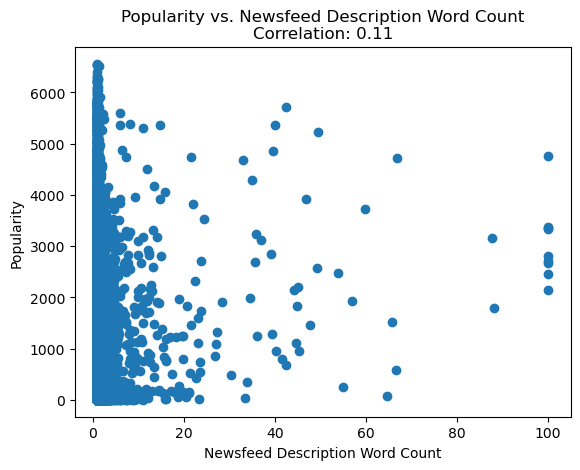

In [360]:
import matplotlib.pyplot as plt
correlation = df['views'].corr(df['duration_days'])

# Plot
plt.scatter(df['views'], df['duration_days'])
plt.title(f"Popularity vs. Newsfeed Description Word Count\nCorrelation: {correlation:.2f}")
plt.xlabel('Newsfeed Description Word Count')
plt.ylabel('Popularity')
plt.show()

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
# Ensure you have downloaded the stopwords dataset
nltk.download('stopwords')
# List of stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stopwords from a sentence
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

C:\Users\glb\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
import datetime
def date_formater(post_date):
    try:
        datetime_obj = datetime.datetime.strptime(post_date, "%Y-%m-%d %H:%M:%S")
        post_year = datetime_obj.year
        post_month = datetime_obj.month
        post_day = datetime_obj.day
        return {"year":post_year,"month": post_month, "day":post_day}
    except ValueError:
        raise ValueError("Invalid date format. Please provide a string in YYYY-MM-DD HH:MM:SS format.")

In [16]:
date_formater("2023-06-13 22:00:00")['month']#.get("year")

6

In [2]:
remove_stopwords("Hear Real-World Success Stories. Power Up Your 2023 Defense Capabilities!")

'Hear Real-World Success Stories. Power 2023 Defense Capabilities!'

In [40]:
import pandas as pd
import pickle

# Load the trained model from the pickle file
with open(r"C:\Users\glb\Downloads\Faisal Data\Popularity_model2.0.pkl", 'rb') as f:
    Popularity_model = pickle.load(f)

def test(post_day,
        post_year,
        post_month,
        country,
        call_to_action,
        likes,
        comments, 
        ad_position, 
        cleaned_ad_title,
        cleaned_newsfeed_description, 
        cleaned_ad_text,
        duration_days):
    
    # Example single payload as a dictionary
    single_payload = {
        'post_day': post_day,
        'post_year': post_year,
        'post_month': post_month,
        'country': country,
        'call_to_action': call_to_action,
        'likes': likes,
        'comments': comments,
        'ad_position': ad_position,
        'cleaned_ad_title': cleaned_ad_title,
        'cleaned_newsfeed_description': cleaned_newsfeed_description,
        'cleaned_ad_text': cleaned_ad_text,
        'duration_days': duration_days
    }

    # Convert the single payload to a pandas DataFrame
    single_payload_df = pd.DataFrame([single_payload])

    # Use the loaded model to make predictions
    single_prediction_scaled_log = Popularity_model.predict(single_payload_df)

    print(f'Predicted Views (scaled log): {single_prediction_scaled_log[0]}')
    return single_prediction_scaled_log[0]


C:\Users\glb\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\glb\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\glb\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.2 when using version 1.3.0. This might lead to breaking code or

In [41]:
df_test.columns

Index(['id', 'network', 'type', 'platform', 'thumbnails', 'videoUrlOriginal',
       'thumbnailUrlOriginal', 'source', 'adPosition', 'adTitle',
       'newsfeedDescription', 'adText', 'callToAction', 'destinationUrl',
       'adUrl', 'country', 'state', 'city', 'postOwner', 'firstSeen',
       'lastSeen', 'postDate', 'totalRepeatedCount', 'uniqueCityCount',
       'category', 'adsgptId', 'mediaUrl', 'adDisplay', 'created_at',
       'duration', 'likes', 'views', 'adVideo', 'comments', 'postOwnerImage',
       'adImage', 'verified'],
      dtype='object')

In [42]:
df_test_dict=df_test.T.to_dict()


In [113]:
df_test

,id,network,type,platform,thumbnails,videoUrlOriginal,thumbnailUrlOriginal,source,adPosition,adTitle,...,adDisplay,created_at,duration,likes,views,adVideo,comments,postOwnerImage,adImage,verified
0,67339,youtube,DISPLAY,3,/DefaultImage.jpg,https://lh3.googleusercontent.com/proxy/aHI3R3...,https://lh3.googleusercontent.com/proxy/aHI3R3...,[Desktop],FEED,Join 30k Testers & Developers @Testμ'24,...,/bydefault_ads.png,1718800844517,0,0,0,,0,,,
1,53854,youtube,DISPLAY,3,/DefaultImage.jpg,https://lh3.googleusercontent.com/proxy/tK9aSC...,,[Desktop],FEED,Get Complimentary Airport Lounge Access.,...,pasimages/youtube/ads/122586533.webp,1718891915284,1,0,0,,0,,,
2,53858,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=qg4F_Mbo2yk,,[desktop],FEED,,...,,1718891915444,1,1,21522,/bydefault_ads.png,0,,,
3,53859,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=3JOdZHAQNfQ,,[desktop],FEED,AI eLearning,...,,1718891915517,1,0,58580,/bydefault_ads.png,0,,,
4,53817,youtube,VIDEO,3,/DefaultImage.jpg,https://www.youtube.com/watch?v=spwj-tWRs0E,,[desktop],FEED,,...,,1718891910071,1,251,11639672,/bydefault_ads.png,16,pasimages/youtube/postowner/postowner_16492915...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,57350,youtube,IMAGE,12,pasimages/youtube/thumbnail/f1f1b9adadede5e5.jpg,https://yt3.ggpht.com/5vXXm3Owf9GcW0UrqgPu2QTG...,https://yt3.ggpht.com/5vXXm3Owf9GcW0UrqgPu2QTG...,[desktop],SIDE,SchnelleTM Ultra,...,,1718892103542,0,0,0,,0,pasimages/youtube/postowner/postowner_f1f1b9ad...,pasimages/youtube/ads/f1f1b9adadede5e5.webp,
96,55630,youtube,VIDEO,12,pasimages/youtube/thumbnail/FScArY0fB2c.jpg,https://www.youtube.com/watch?v=FScArY0fB2c,https://i.ytimg.com/vi/FScArY0fB2c/hqdefault.jpg,[desktop],FEED,Warzone win!,...,,1718892095325,149,0,629,/bydefault_ads.png,0,/DefaultImage.jpg,,
97,57244,youtube,VIDEO,12,pasimages/youtube/thumbnail/HFFm5vA9yfI.jpg,https://www.youtube.com/watch?v=HFFm5vA9yfI,https://i.ytimg.com/vi/HFFm5vA9yfI/hqdefault.jpg,[desktop],FEED,Introducing Ground Grading,...,,1718892095711,0,41,9829,/bydefault_ads.png,0,pasimages/youtube/postowner/postowner_HFFm5vA9...,,
98,57384,youtube,DISPLAY,12,pasimages/youtube/thumbnail/6e41ef967dce0cf297...,https://lh3.googleusercontent.com/proxy/HCF4An...,https://lh3.googleusercontent.com/proxy/HCF4An...,[desktop],SIDE,Hot Desk Booking System,...,pasimages/youtube/ads/6e41ef967dce0cf297b9a061...,1718892105205,0,0,0,,0,,,


In [118]:
for i in df_test:
    print(df_test["likes"][0])
    break

251


In [120]:
df_test.columns

Index(['id', 'network', 'type', 'platform', 'thumbnails', 'videoUrlOriginal',
       'thumbnailUrlOriginal', 'source', 'adPosition', 'adTitle',
       'newsfeedDescription', 'adText', 'callToAction', 'destinationUrl',
       'adUrl', 'country', 'state', 'city', 'postOwner', 'firstSeen',
       'lastSeen', 'postDate', 'totalRepeatedCount', 'uniqueCityCount',
       'category', 'adsgptId', 'mediaUrl', 'adDisplay', 'created_at',
       'duration', 'likes', 'views', 'adVideo', 'comments', 'postOwnerImage',
       'adImage', 'verified'],
      dtype='object')

In [123]:
y_pred=[]
y_test=[]
counter=0
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for item in df_test:
    try:
        post_day=date_formater(item.get("postDate")[0]).get("day"),
        post_year=date_formater(item.get("postDate")[0]).get("year"),
        post_month=date_formater(item.get("postDate")[0]).get("month"),
        country=item["country"] if item["country"][0] else "a",
        call_to_action=item["callToAction"] if item["callToAction"][0] else "Learn more" ,
        likes=scaler.fit_transform(item["likes"] if item["likes"][0] else 0),
        comments = scaler.fit_transform(item['comments'] if item['comments'][0] else 0), 
        ad_position=item["adPosition"] if item["adPosition"][0] else "FEED", 
        cleaned_ad_title=remove_stopwords(item["adTitle"] if item["adTitle"][0] else ""),
        cleaned_newsfeed_description=remove_stopwords(item["newsfeedDescription"] if item["newsfeedDescription"][0] else ""), 
        cleaned_ad_text=remove_stopwords(item["adText"] if item["adText"][0] else ""),
        duration_days=item["duration"] if item["duration"][0] else 0

        y_pred_value=test(post_day[0],
            post_year[0],
            post_month[0],
            country[0],
            call_to_action[0],
            likes[0],
            comments[0],
            ad_position[0],
            cleaned_ad_title[0],
            cleaned_newsfeed_description[0],
            cleaned_ad_text[0],
            duration_days)
        y_pred.append(y_pred_value)
        y_test.append(row["views"])
    except:
        pass
    counter+=1
    if counter>10000:
        break
        

In [49]:
import numpy as np
eval_df=pd.DataFrame({"y_pred":y_pred, "y_test":y_test})
eval_df['y_test'] = np.log(eval_df['y_test'] + 1) 
scaler_y = MinMaxScaler(feature_range=(1, 100))
eval_df['y_test'] = scaler_y.fit_transform(eval_df[['y_test']])

NameError: name 'MinMaxScaler' is not defined

In [46]:
eval_df.head()

,y_pred,y_test
0,54.029455,10.961799
1,53.579926,10.961799
2,56.607273,15.974795
3,53.093157,13.822739
4,51.176715,7.268760


In [56]:
eval_df.describe()

,y_pred,y_test
count,2508.000000,2508.000000
mean,50.081077,6.260876
std,13.269677,10.317411
min,22.969783,1.000000
25%,42.275262,1.164993
50%,48.614286,2.276028
75%,55.862078,6.187810
max,95.262884,100.000000


In [62]:
eval_df.to_csv("evaluations.csv", index=False)

In [47]:
y_test=eval_df.y_test
y_pred=eval_df.y_pred

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


R2 Score: -18.215499403372245


In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 43.82397856996487


In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2044.6547026194407


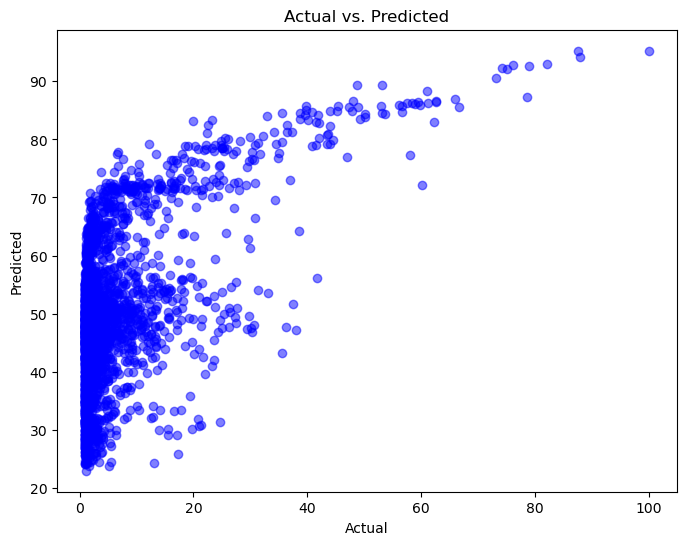

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


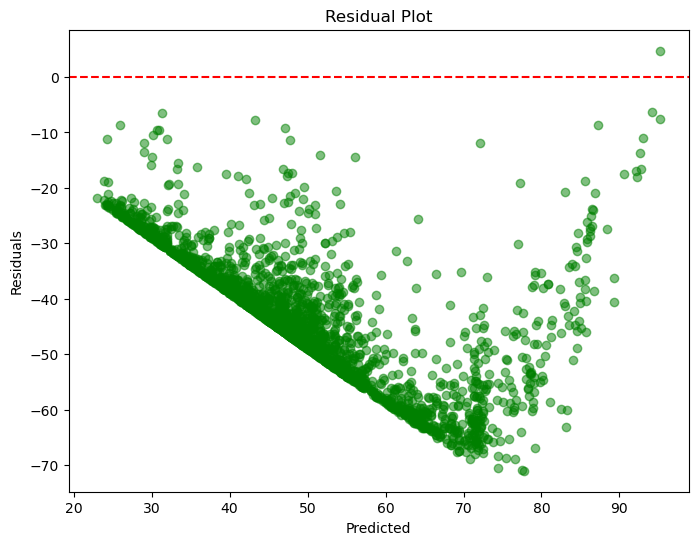

In [52]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()


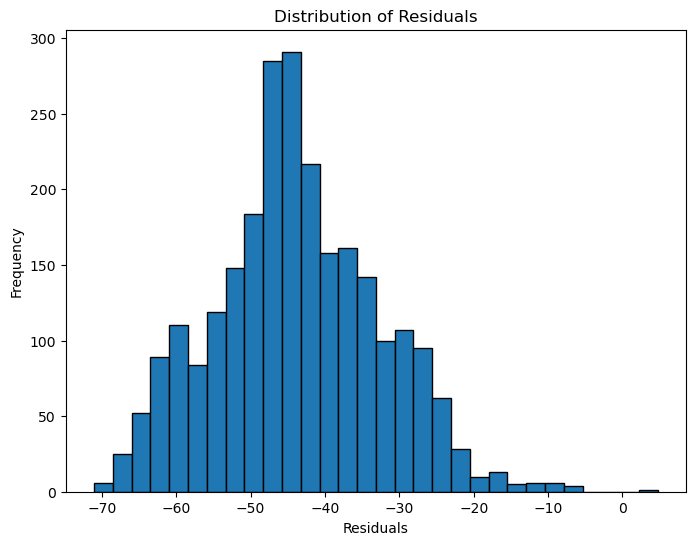

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


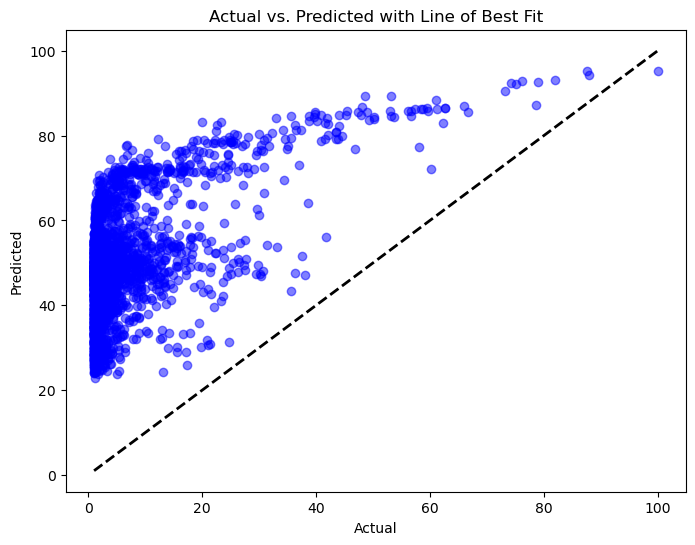

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted with Line of Best Fit')
plt.show()


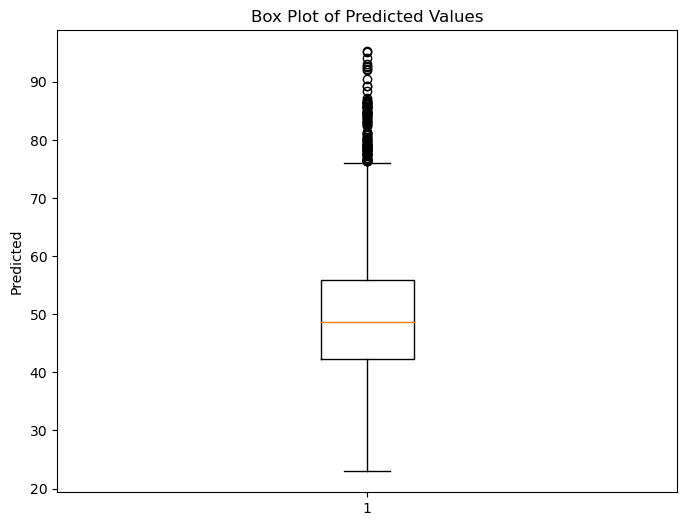

In [55]:
plt.figure(figsize=(8, 6))
plt.boxplot(y_pred)
plt.ylabel('Predicted')
plt.title('Box Plot of Predicted Values')
plt.show()


In [31]:
# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), ['likes', 'comments', 'duration_days', 'post_year', 'post_month', 'post_day']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['city', 'state', 'country', 'call_to_action']),
        ('label_cat', OrdinalEncoder(),['source_type','ad_position']),
        ('text_ad_title', TfidfVectorizer(max_features=5000), 'cleaned_ad_title'),
        ('text_newsfeed_description', TfidfVectorizer(max_features=5000), 'cleaned_newsfeed_description'),
        ('text_ad_text', TfidfVectorizer(max_features=5000), 'cleaned_ad_text'),
        ('text_ad_tags', TfidfVectorizer(max_features=5000), 'cleaned_tags')
    ],
    remainder='drop'
)


svd = TruncatedSVD(n_components=20)

# Define model
# model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=90)
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=500, random_state=90, n_jobs=3)
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd),
    ('model', model)
])


# Make predictions
y_pred = pipeline.predict(X_test)


SyntaxError: expression expected after dictionary key and ':' (3273073042.py, line 2)

In [ ]:
{
        "_index": "devadsgpt_ads_data_2",
        "_id": "R7-wd5ABDoc9lXBJ_GVp",
        "_score": 1.8541949,
        "_source": {
          "id": 53703,
          "network": "youtube",
          "type": "DISPLAY",
          "platform": 12,
          "thumbnails": "pasimages/youtube/thumbnail/58e6e5cd178f3a4bd4a1225415c24dfb813f7a5a.jpg",
          "videoUrlOriginal": "https://lh5.googleusercontent.com/proxy/TJzcSjhx1NXg3L8PtPb6wCuLVPaPKceUdKfeK5u7cKDn4ju7cKb8ZFEBxyUGpv2IxrhCFAsivAFVLUqQ5dZFOudcInyWFvGrsi06kFYa-Zq4cpQ9VpWvitjTbU25rpPLoRa8",
          "thumbnailUrlOriginal": "https://lh5.googleusercontent.com/proxy/TJzcSjhx1NXg3L8PtPb6wCuLVPaPKceUdKfeK5u7cKDn4ju7cKb8ZFEBxyUGpv2IxrhCFAsivAFVLUqQ5dZFOudcInyWFvGrsi06kFYa-Zq4cpQ9VpWvitjTbU25rpPLoRa8",
          "source": [
            "desktop"
          ],
          "adPosition": "SIDE",
          "adTitle": "Accelerate Business Resilience",
          "newsfeedDescription": "Hear Real-World Success Stories. Power Up Your 2023 Defense Capabilities!",
          "adText": "trendmicro.com",
          "callToAction": "VISIT SITE",
          "destinationUrl": "https://www.trendmicro.com/en_us/business/campaigns/world-tour.html?gclid=EAIaIQobChMIgvKi5KKh_gIVBQytBh00EwmlEAEYASAAEgLaRPD_BwE#tabs-bd77f7-7",
          "country": [
            "United States"
          ],
          "postOwner": "trendmicro",
          "firstSeen": "2023-04-11 06:12:55",
          "lastSeen": "2023-04-11 07:12:58",
          "postDate": "2023-04-11 06:12:55",
          "totalRepeatedCount": 1,
          "uniqueCityCount": 1,
          "category": "technology_and_software",
          "adsgptId": "53703youtube",
          "mediaUrl": "pasimages/youtube/ads/58e6e5cd178f3a4bd4a1225415c24dfb813f7a5a",
          "adDisplay": "pasimages/youtube/ads/58e6e5cd178f3a4bd4a1225415c24dfb813f7a5a",
          "duration": 1,
          "adType": "image",
          "created_at": 1719995006057
        }
    
    {
        "_index": "devadsgpt_ads_data_2",
        "_id": "Sr-wd5ABDoc9lXBJ_WUk",
        "_score": 1.8541949,
        "_source": {
          "id": 53706,
          "network": "youtube",
          "type": "IMAGE",
          "platform": 12,
          "thumbnails": "pasimages/youtube/thumbnail/1e9e8ab0d98c9f8f.jpg",
          "videoUrlOriginal": "https://yt3.ggpht.com/n7wycEcp91RdvNrcuiOEIuBWlOg3LRbLrxY22m7xNakLn6ogJg5uTMR6LKXNCazWnesHP04MRA=w1060-fcrop64=1,00005a57ffffa5a8-k-c0xffffffff-no-nd-rj",
          "thumbnailUrlOriginal": "https://yt3.ggpht.com/n7wycEcp91RdvNrcuiOEIuBWlOg3LRbLrxY22m7xNakLn6ogJg5uTMR6LKXNCazWnesHP04MRA=w1060-fcrop64=1,00005a57ffffa5a8-k-c0xffffffff-no-nd-rj",
          "source": [
            "desktop"
          ],
          "adPosition": "SIDE",
          "adTitle": "Try Remitly",
          "newsfeedDescription": "www.remitly.com",
          "callToAction": "LEARN MORE",
          "destinationUrl": "https://www.remitly.com/us/en/india?gclid=EAIaIQobChMI_euf6qKh_gIVFusoBR00IwwPEAEYAiAAEgLrlvD_BwE",
          "adImage": "pasimages/youtube/ads/1e9e8ab0d98c9f8f",
          "adUrl": "https://yt3.ggpht.com/n7wycEcp91RdvNrcuiOEIuBWlOg3LRbLrxY22m7xNakLn6ogJg5uTMR6LKXNCazWnesHP04MRA=w1060-fcrop64=1,00005a57ffffa5a8-k-c0xffffffff-no-nd-rj",
          "country": [
            "United States"
          ],
          "postOwner": "remitly",
          "firstSeen": "2023-04-11 06:14:17",
          "lastSeen": "2023-04-11 07:14:20",
          "postDate": "2023-04-11 06:14:17",
          "totalRepeatedCount": 1,
          "uniqueCityCount": 1,
          "category": "beauty_fashion_and_lifestyle",
          "adsgptId": "53706youtube",
          "mediaUrl": "pasimages/youtube/ads/1e9e8ab0d98c9f8f",
          "postOwnerImage": "pasimages/youtube/postowner/postowner_1e9e8ab0d98c9f8f_0_1681197260.jpg",
          "duration": 1,
          "adType": "image",
          "created_at": 1719995006244
        }
        
        
        {
        "_index": "devadsgpt_ads_data_2",
        "_id": "P7-xd5ABDoc9lXBJ72yh",
        "_score": 9.32884,
        "_source": {
          "id": 53999,
          "network": "youtube",
          "type": "DISCOVERY",
          "likes": 19000,
          "views": 1013576,
          "platform": 12,
          "thumbnails": "pasimages/youtube/thumbnail/3bff8a5f62c84cec5efa13969a3a64f86990f242.jpg",
          "videoUrlOriginal": "https://i1.ytimg.com/vi/AVXYq8aL47Q/0.jpg",
          "thumbnailUrlOriginal": "https://i1.ytimg.com/vi/AVXYq8aL47Q/0.jpg",
          "source": [
            "desktop"
          ],
          "adPosition": "SIDE",
          "adTitle": "18 Commands That Will Change The Way You Use Linux Forever",
          "newsfeedDescription": "1,012,986 views Mar 2, 2022 Top Docs | Learn the BasicsWhen it comes to using Linux, there's usually a few ways to accomplish a task. Here are eighteen commands that will change the way you use Linux forever. Whether you're a Linux newbie or a seasoned SysAdmin, you'll find this video helpful. Presented by @LearnLinuxTV Chapters:0:00 Introduction0:38 Navigating Directories2:02 Clearing the Terminal3:48 Navigating Directories with a Different Tool5:45 Minimizing an App7:36 Restoring an App8:44 Repeating the Last Command with sudo10:03 Review the Command History11:28 A Better Way to Run Previous Commands13:21 Making Previous History Search Even Better With Timestamps17:07 Take the Blue Pill19:17 Adjust Font Size20:17 Clearing a Line20:51 Moving to the Front of the Line21:10 Moving to the End of the Line22:03 Chaining Commands Together25:49 Tailing Files26:41 Truncating Files28:03 Using the Column Command29:13 ConclusionNew to Linode? Get started here with a $100 credit → https://www.linode.com/linodetube Read the doc for more information on using the Linode CLI→ https://www.linode.com/docs/guides/li...Learn more about the Linode CLI→ https://www.linode.com/products/cli/Subscribe to get notified of new episodes as they come out → https://www.youtube.com/linode?sub_co...#Linode #Linux #CommandLine #AlternativeCloudProduct: Linode, Command Line Interface; @LearnLinuxTV ;ChaptersView allIntroduction0:00Navigating Directories0:38Clearing the Terminal2:02Navigating Directories with a Different Tool3:48Featured playlist83 videosTop Docs | Learn the BasicsLinodeShow less",
          "destinationUrl": "https://www.youtube.com/watch?v=AVXYq8aL47Q",
          "adUrl": "https://www.youtube.com/watch?v=AVXYq8aL47Q",
          "country": [
            "United States"
          ],
          "postOwner": "Linode",
          "firstSeen": "2023-05-23 05:06:44",
          "lastSeen": "2023-05-24 00:17:56",
          "postDate": "2022-03-01 23:00:00",
          "totalRepeatedCount": 1,
          "uniqueCityCount": 1,
          "category": "technology_and_software",
          "adsgptId": "53999youtube",
          "adBudget": "NaN",
          "mediaUrl": "https://i1.ytimg.com/vi/AVXYq8aL47Q/0.jpg",
          "adDiscovery": "/bydefault_ads.png",
          "postOwnerImage": "images/home",
          "duration": 1,
          "adType": "image",
          "created_at": 1719995068321
        }
            
            
            
            {
        "_index": "devadsgpt_ads_data_2",
        "_id": "hL-wd5ABDoc9lXBJ3GKR",
        "_score": 3.4455185,
        "_source": {
          "id": 53685,
          "network": "youtube",
          "type": "VIDEO",
          "views": 5021,
          "platform": 3,
          "thumbnails": "/DefaultImage.jpg",
          "videoUrlOriginal": "https://www.youtube.com/watch?v=1Q86wa_3PQ8",
          "source": [
            "desktop"
          ],
          "adPosition": "FEED",
          "adTitle": "",
          "newsfeedDescription": "",
          "adText": "shopee.co.id",
          "destinationUrl": "https://shopee.co.id/shop/36092728/search/?gclid=EAIaIQobChMI_83fpamN_gIVwgaDAx3wSwLlEAEYAiAAEgIL4fD_BwE&is_seller=true&page=0&shopCollection=156818107&smtt=9&utm_campaign=s36092728_ss_id_gins_uvidmyfacemyway&utm_content=herovid2&utm_medium=seller&utm_source=google",
          "adUrl": "https://www.youtube.com/watch?v=1Q86wa_3PQ8",
          "country": [
            "Indonesia"
          ],
          "postOwner": "shopee",
          "firstSeen": "2023-04-03 08:30:54",
          "lastSeen": "2023-04-03 08:49:24",
          "postDate": "2023-03-19 00:00:00",
          "totalRepeatedCount": 1,
          "uniqueCityCount": 1,
          "category": "politics_and_election",
          "adsgptId": "53685youtube",
          "mediaUrl": "https://www.youtube.com/watch?v=1Q86wa_3PQ8",
          "adVideo": "/bydefault_ads.png",
          "postOwnerImage": "pasimages/youtube/postowner/postowner_6929696969692969_0_1696832575.jpg",
          "duration": 1,
          "adType": "video",
          "created_at": 1719994997903
        }